In [3]:
import pandas as pd
import missingno as msno

In [4]:
# ruta del archivo CSV
file_path = '/workspaces/machine-learning-python-template/data/raw/AB_NYC_2019.csv'

# Cargamos los datos en un DataFrame
df = pd.read_csv(file_path)

# Mostramos las primeras filas del DataFrame para verificar que se hayan cargado correctamente
print(df.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [5]:
# Info de los datos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.shape

(48895, 16)

In [7]:
# Valores unicos 
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
# Verificar valores duplicados

duplicates = df.duplicated().sum()
print("Número de filas duplicadas:", duplicates)

Número de filas duplicadas: 0


In [10]:
# Verificar valores nulos
missing_values = df.isnull().sum()
print("\nValores nulos por columna:")
print(missing_values)


Valores nulos por columna:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


<Axes: >

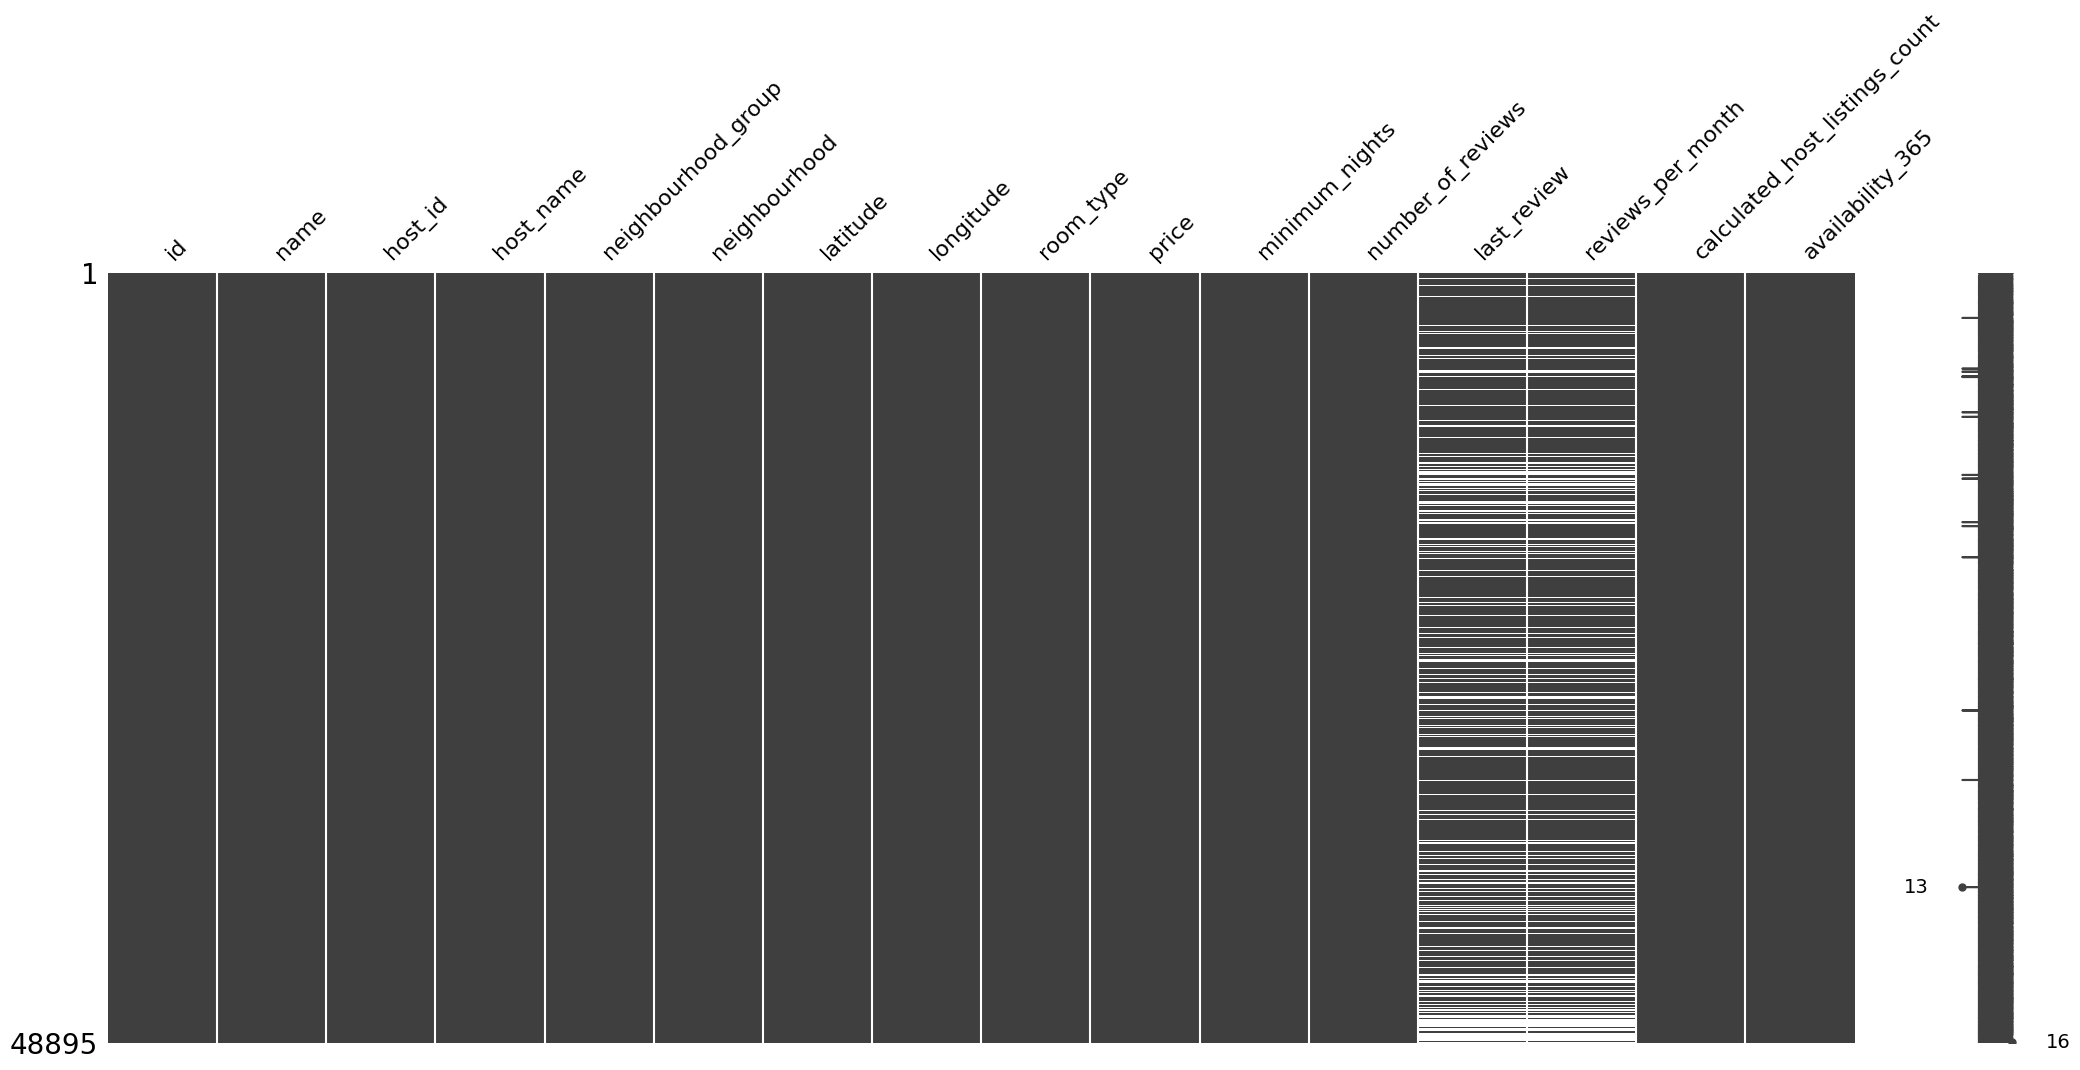

In [12]:
# Visualizamos los valores faltantes como una matriz
msno.matrix(df)

In [13]:
# Importamos la clase KNNImputer de scikit-learn
from sklearn.impute import KNNImputer

In [14]:
# Inicializamos el imputador KNN con el número de vecinos a utilizar
imputador = KNNImputer(n_neighbors=5)

# Definimos las columnas numericas que queremos imputar (Reviews per Month)
columnas_numericas = ['reviews_per_month']

# Imputamos valores faltantes en las columnas numéricas
df[columnas_numericas] = imputador.fit_transform(df[columnas_numericas])

# Hacemos un print para verificar que no haya valores nulos despues de la imputación
print("Valores nulos despues de la imputación:", df.isnull().sum())

Valores nulos despues de la imputación: id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [15]:
# Vemos mas al detalle la columna last reviews
# Convertir la columna 'last_review' a tipo datetime
df['last_review'] = pd.to_datetime(df['last_review'])

# Encontrar la fecha más reciente y la fecha más lejana
fecha_mas_reciente = df['last_review'].max()
fecha_mas_lejana = df['last_review'].min()

# Imprimir los resultados
print("Fecha más reciente:", fecha_mas_reciente)
print("Fecha más lejana:", fecha_mas_lejana)

Fecha más reciente: 2019-07-08 00:00:00
Fecha más lejana: 2011-03-28 00:00:00


In [16]:
# Convertir 'last_review' a tipo datetime
df['last_review'] = pd.to_datetime(df['last_review'])

# Imputamos los valores faltantes en 'last_review' utilizando la interpolación
df['last_review_imputado'] = df['last_review'].interpolate(method='linear')

# Imprimir el DataFrame con los valores imputados
print(df[['last_review', 'last_review_imputado']].head())

  last_review last_review_imputado
0  2018-10-19  2018-10-19 00:00:00
1  2019-05-21  2019-05-21 00:00:00
2         NaT  2019-06-12 12:00:00
3  2019-07-05  2019-07-05 00:00:00
4  2018-11-19  2018-11-19 00:00:00


In [17]:
# Reemplazamos la columna 'last_review' por 'last_review_imputado'
df['last_review'] = df['last_review_imputado']

# Eliminamos la columna 'last_review_imputado' 
df.drop('last_review_imputado', axis=1, inplace=True)

# Hacemos un print del dataframe con la columna reemplazada
print(df.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire ho

In [18]:
# Verifica valores nulos
missing_values = df.isnull().sum()
print("\nValores nulos por columna:")
print(missing_values)


Valores nulos por columna:
id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64


In [19]:
# Eliminar las columnas 'name' y 'host_name'
df.drop(['name', 'host_name'], axis=1, inplace=True)

# Imprimir el DataFrame resultante
print(df.head())

     id  host_id neighbourhood_group neighbourhood  latitude  longitude  \
0  2539     2787            Brooklyn    Kensington  40.64749  -73.97237   
1  2595     2845           Manhattan       Midtown  40.75362  -73.98377   
2  3647     4632           Manhattan        Harlem  40.80902  -73.94190   
3  3831     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4  5022     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

          last_review  reviews_per_month  calculated_host_listings_count  \
0 2018-10-19 00:00:00           0.210000                               6   
1 2019-05-21

In [20]:
# Verifica valores nulos
missing_values = df.isnull().sum()
print("\nValores nulos por columna:")
print(missing_values)


Valores nulos por columna:
id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [21]:
# Vamos asignar un valor numerico unico a cada categoria en las columnas categóricas
from sklearn.preprocessing import OrdinalEncoder

# Inicializar el codificador ordinal
ordinal_encoder = OrdinalEncoder()

# Aplicar codificación ordinal a las columnas categóricas
df[['room_type', 'neighbourhood_group', 'neighbourhood']] = ordinal_encoder.fit_transform(df[['room_type', 'neighbourhood_group', 'neighbourhood']])

# Imprimir las primeras filas del DataFrame con las nuevas columnas codificadas
print(df.head())

     id  host_id  neighbourhood_group  neighbourhood  latitude  longitude  \
0  2539     2787                  1.0          108.0  40.64749  -73.97237   
1  2595     2845                  2.0          127.0  40.75362  -73.98377   
2  3647     4632                  2.0           94.0  40.80902  -73.94190   
3  3831     4869                  1.0           41.0  40.68514  -73.95976   
4  5022     7192                  2.0           61.0  40.79851  -73.94399   

   room_type  price  minimum_nights  number_of_reviews         last_review  \
0        1.0    149               1                  9 2018-10-19 00:00:00   
1        0.0    225               1                 45 2019-05-21 00:00:00   
2        1.0    150               3                  0 2019-06-12 12:00:00   
3        0.0     89               1                270 2019-07-05 00:00:00   
4        0.0     80              10                  9 2018-11-19 00:00:00   

   reviews_per_month  calculated_host_listings_count  availability_3

Resumen estadístico de 'price':
count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


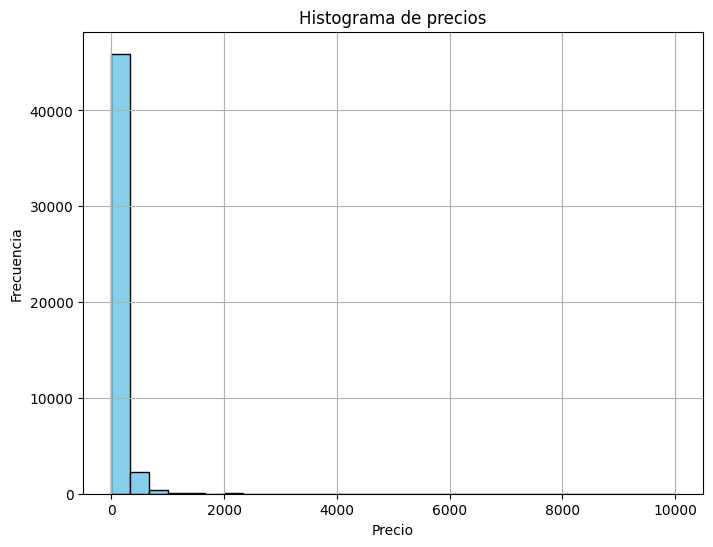

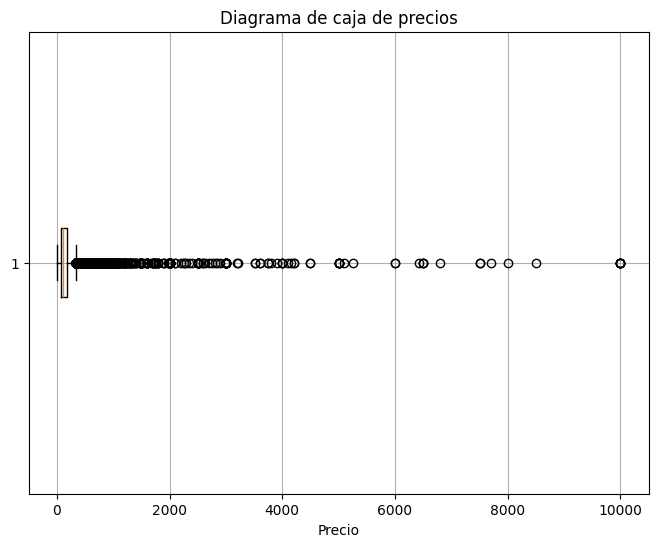

In [22]:
import matplotlib.pyplot as plt

# Resumen estadístico del precio
print("Resumen estadístico de 'price':")
print(df['price'].describe())

# Histograma
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Diagrama de caja
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'], vert=False)
plt.title('Diagrama de caja de precios')
plt.xlabel('Precio')
plt.grid(True)
plt.show()

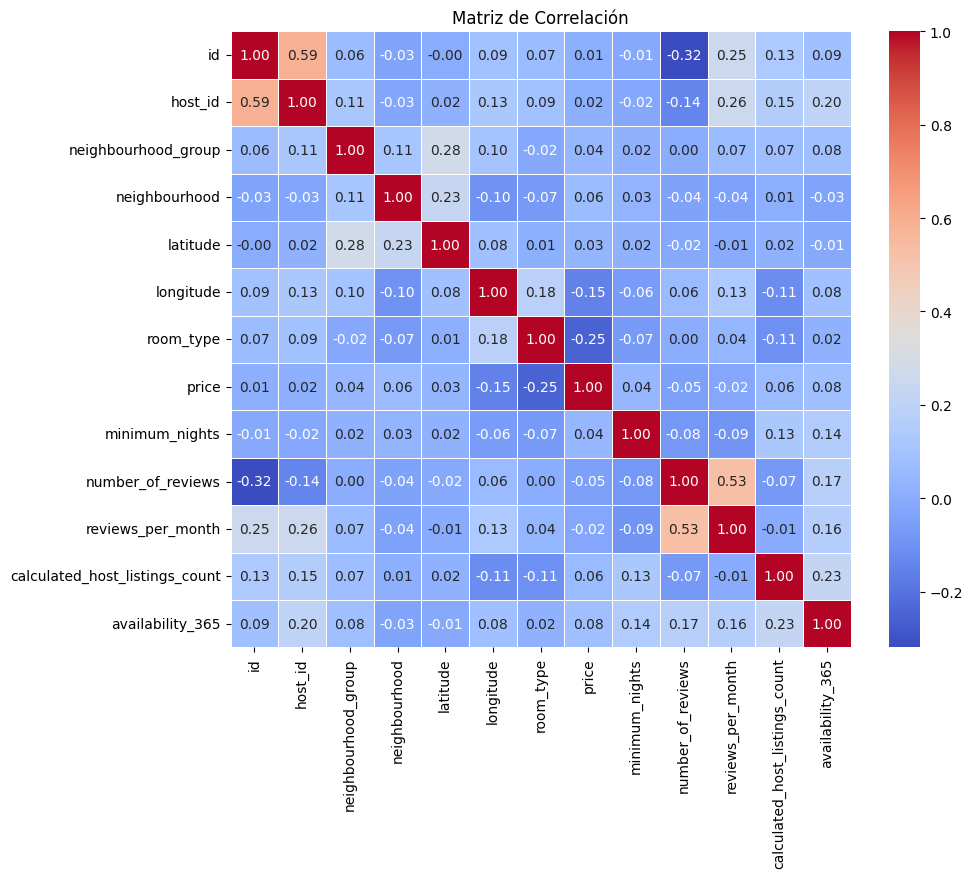

In [23]:
import seaborn as sns

# Matriz de correlacion

# Seleccionamos solo las columnas numéricas para calcular la correlación
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizacion de la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [24]:
# Seleccionamos las mejores caracteristicas del conjunto de datos usando SelectKBest

from sklearn.feature_selection import SelectKBest, f_regression

# Separar características (X) y variable objetivo (y)
X = df_numeric.drop(columns=['price'])  # Características
y = df_numeric['price']  # Variable objetivo

# Inicializar SelectKBest con la prueba estadística f_regression y seleccionar las 5 mejores características
select_k_best = SelectKBest(score_func=f_regression, k=5)

# Aplicar SelectKBest a las características (X) y obtener las características seleccionadas
X_selected = select_k_best.fit_transform(X, y)

# Obtener los índices de las características seleccionadas
selected_indices = select_k_best.get_support(indices=True)

# Obtener los nombres de las características seleccionadas
selected_features = X.columns[selected_indices]

# Crear un nuevo DataFrame con las características seleccionadas
df_selected = pd.DataFrame(X_selected, columns=selected_features)

# Imprimir las primeras filas del DataFrame con las características seleccionadas
print(df_selected.head())

   neighbourhood  longitude  room_type  calculated_host_listings_count  \
0          108.0  -73.97237        1.0                             6.0   
1          127.0  -73.98377        0.0                             2.0   
2           94.0  -73.94190        1.0                             1.0   
3           41.0  -73.95976        0.0                             1.0   
4           61.0  -73.94399        0.0                             1.0   

   availability_365  
0             365.0  
1             355.0  
2             365.0  
3             194.0  
4               0.0  


In [25]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de entrenamiento y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (39116, 12)
Forma de X_test: (9779, 12)
Forma de y_train: (39116,)
Forma de y_test: (9779,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar SelectKBest con la prueba estadística f_regression y seleccionar las 5 mejores características
select_k_best = SelectKBest(score_func=f_regression, k=5)

# Aplicar SelectKBest a las características de entrenamiento y prueba por separado
X_train_selected = select_k_best.fit_transform(X_train, y_train)
X_test_selected = select_k_best.transform(X_test)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_selected, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test_selected)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística:", accuracy)

Precisión del modelo de regresión logística: 0.05174353205849269


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# Escalamos los datos 
from sklearn.preprocessing import StandardScaler

# Inicializar el scaler
scaler = StandardScaler()

# Escalar las características de entrenamiento y prueba
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Crear y entrenar el modelo de regresión logística con los datos escalados (estandarización)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test_scaled)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística después de escalar los datos:", accuracy)

Precisión del modelo de regresión logística después de escalar los datos: 0.07219552101441865


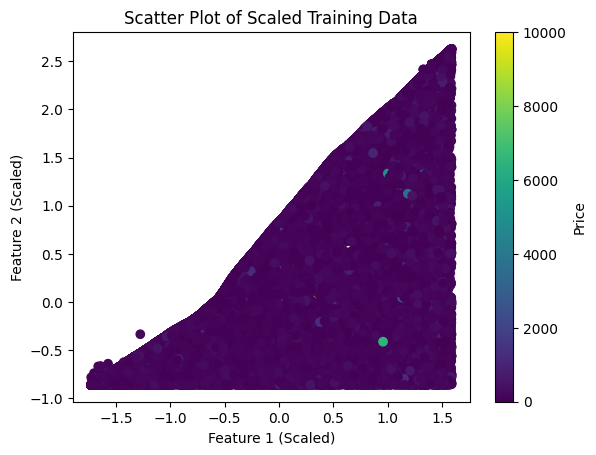

In [32]:
# Plotear los datos de entrenamiento escalados
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('Scatter Plot of Scaled Training Data')
plt.colorbar(label='Price')
plt.show()